In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def initialize_centroids(data, k):
    np.random.seed(0)
    centroids = data.sample(n=k)
    return centroids.values

def assign_to_clusters(data, centroids):
    clusters = []
    for i in range(data.shape[0]):
        point = data.iloc[i].values
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data.iloc[np.where(np.array(clusters) == i)]
        mean_point = cluster_points.mean().values
        new_centroids.append(mean_point)
    return np.array(new_centroids)

def has_converged(old_centroids, new_centroids, tol=1e-4):
    return np.all(np.abs(old_centroids - new_centroids) < tol)

def k_means_clustering(data, k, max_iterations=100):
    data = data.reset_index(drop=True)

    centroids = initialize_centroids(data, k)

    for iteration in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)

        new_centroids = update_centroids(data, clusters, k)

        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

In [ ]:
data = pd.read_csv('Customers.csv')

selected_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
data = data[selected_columns]

k = 5

clusters, final_centroids = k_means_clustering(data, k)

data['Cluster'] = clusters

print("Final Centroids:")
print(final_centroids)
print("\nData with Cluster Assignments:")
print(data)

Final Centroids:
[[44.31818182 25.77272727 20.27272727]
 [40.39473684 87.         18.63157895]
 [53.82352941 54.7254902  48.98039216]
 [24.8        41.46       63.7       ]
 [32.69230769 86.53846154 82.12820513]]

Data with Cluster Assignments:
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        3
2     20                  16                       6        0
3     23                  16                      77        3
4     31                  17                      40        0
..   ...                 ...                     ...      ...
195   35                 120                      79        4
196   45                 126                      28        1
197   32                 126                      74        4
198   32                 137                      18        1
199   30                 137                      83        4

[200 rows 

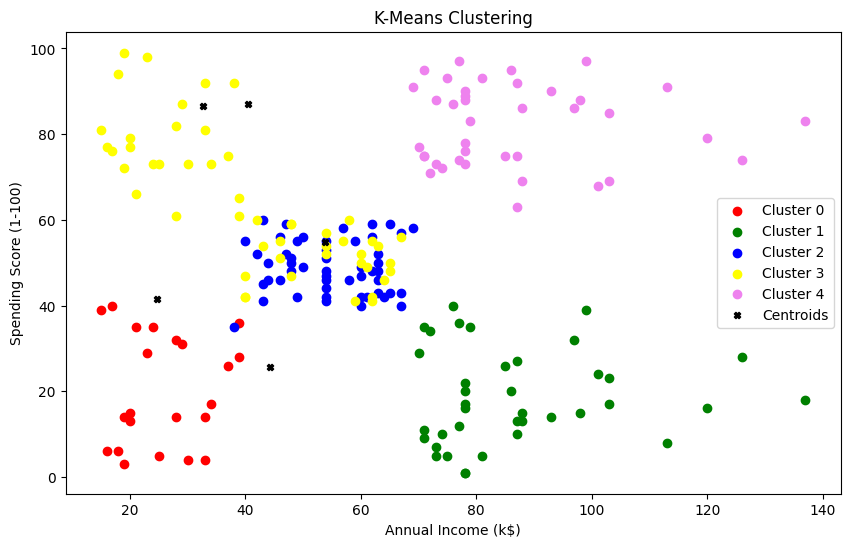

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'yellow', 'violet']

for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data[selected_columns[1]], cluster_data[selected_columns[2]], c=colors[cluster], label=f'Cluster {cluster}')

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.xlabel(selected_columns[1])
plt.ylabel(selected_columns[2])
plt.title('K-Means Clustering')
plt.legend()
plt.show()